In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [14]:
#load datasets
train = '../data/train.csv'
test = '../data/test.csv'

In [15]:
df = pd.read_csv(train)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Info dari dataset

In [16]:
# dimensi dataset
print(f"banyak baris {df.shape[0]}")
print(f"banyak kolom {df.shape[1]}")

banyak baris 1460
banyak kolom 81


In [5]:
# cek duplikat
df[df.duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


ternyata data tidak ada data duplikat

In [6]:
# info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Wahh banyak fitur yang punya missing value, jadi markicek

## Cek Missing Value

In [7]:
# menampilkan missing value
def chek_missing(df):
    sum_nan = df.isna().sum().reset_index()
    sum_nan.columns = ['kolom', 'jumlah_NaN']
    sum_nan["persentase"] = sum_nan.jumlah_NaN/len(df)
    return sum_nan.sort_values("persentase", ascending =  False)
missing = chek_missing(df)

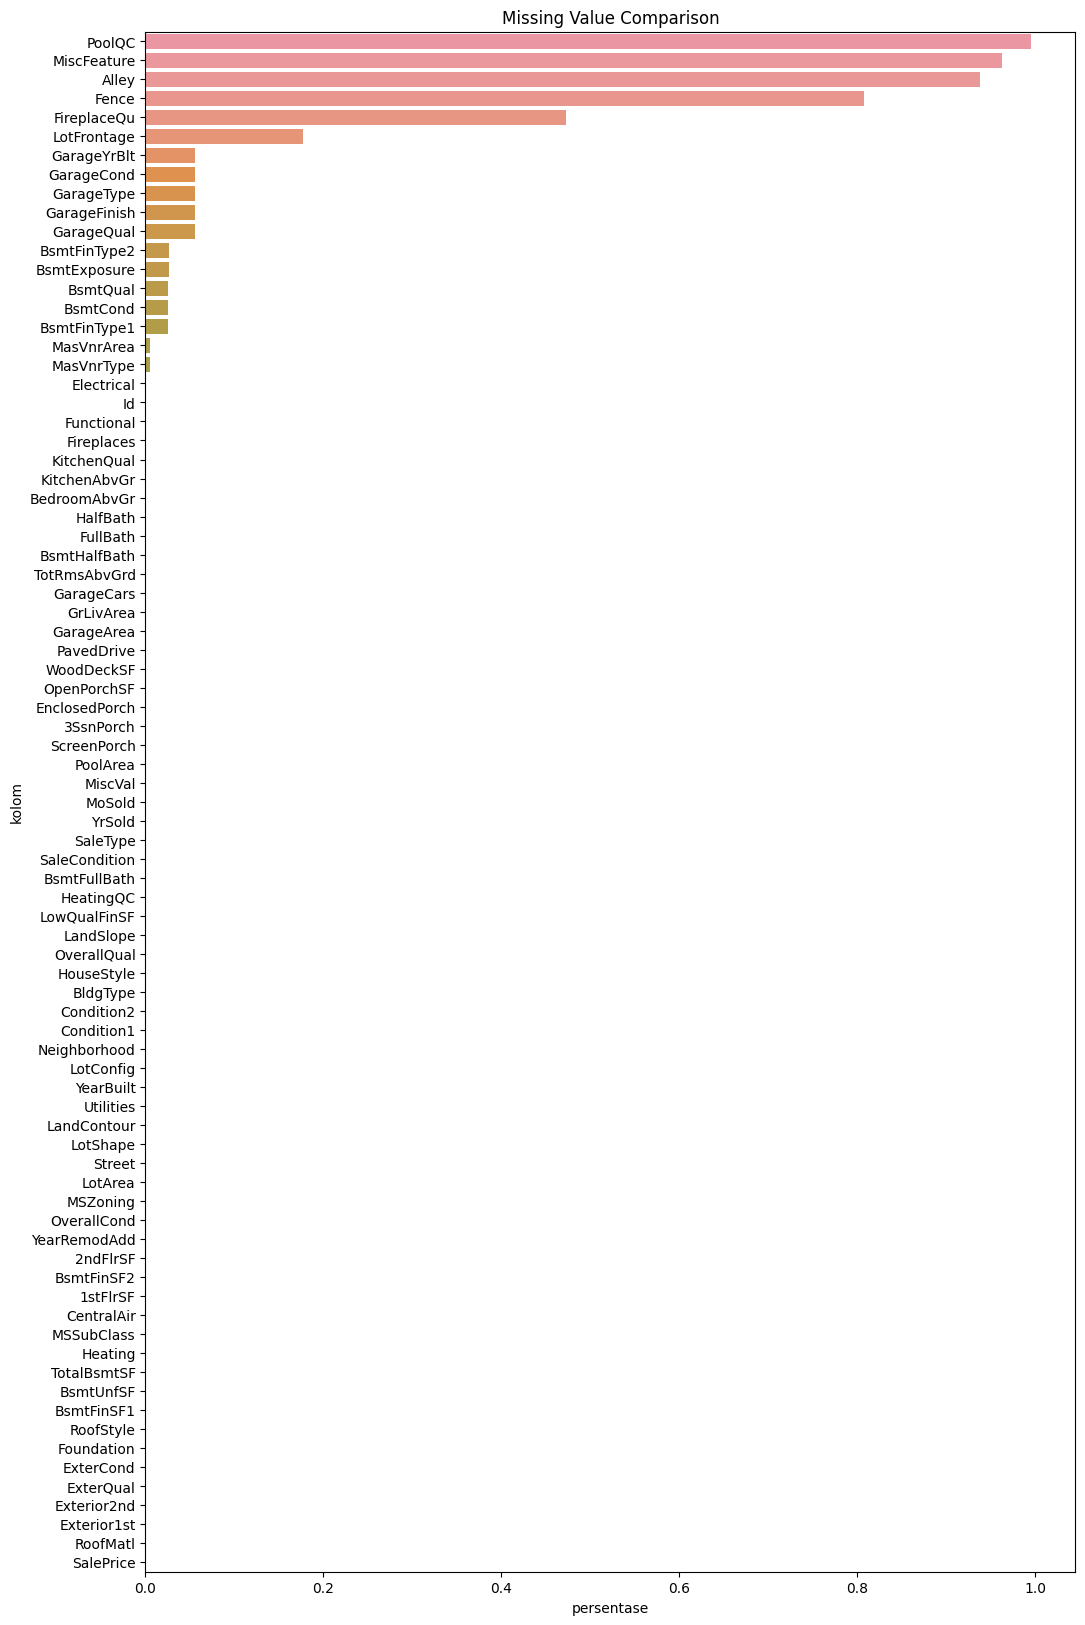

In [8]:
# nampilin visualisasi data null
plt.figure(figsize=(12,20))
sns.barplot(y = missing['kolom'], x = missing['persentase']).set_title("Missing Value Comparison");

fitur data yang missing value tertinggi PoolQC, MiscFeature, Alley, Fence, FireplaceQU

In [9]:
# cek missing value kurang dari 0.7
mis = missing[missing.persentase < 0.7]
mis 

,kolom,jumlah_NaN,persentase
57,FireplaceQu,690,0.472603
3,LotFrontage,259,0.177397
59,GarageYrBlt,81,0.055479
64,GarageCond,81,0.055479
58,GarageType,81,0.055479
...,...,...,...
27,ExterQual,0,0.000000
24,Exterior2nd,0,0.000000
23,Exterior1st,0,0.000000
22,RoofMatl,0,0.000000


In [10]:
to_fix_col = mis[mis.persentase > 0].kolom.tolist()

In [11]:
# drop
df2 = df.drop(missing[missing.persentase > 0.7].kolom.tolist(),1)
to_fix = df2[df2[to_fix_col].describe().columns.tolist()]
to_fix.skew()

C:\Users\RanggaSaputra\AppData\Local\Temp\ipykernel_2276\4111956846.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df2 = df.drop(missing[missing.persentase > 0.7].kolom.tolist(),1)


LotFrontage    2.163569
GarageYrBlt   -0.649415
MasVnrArea     2.669084
dtype: float64

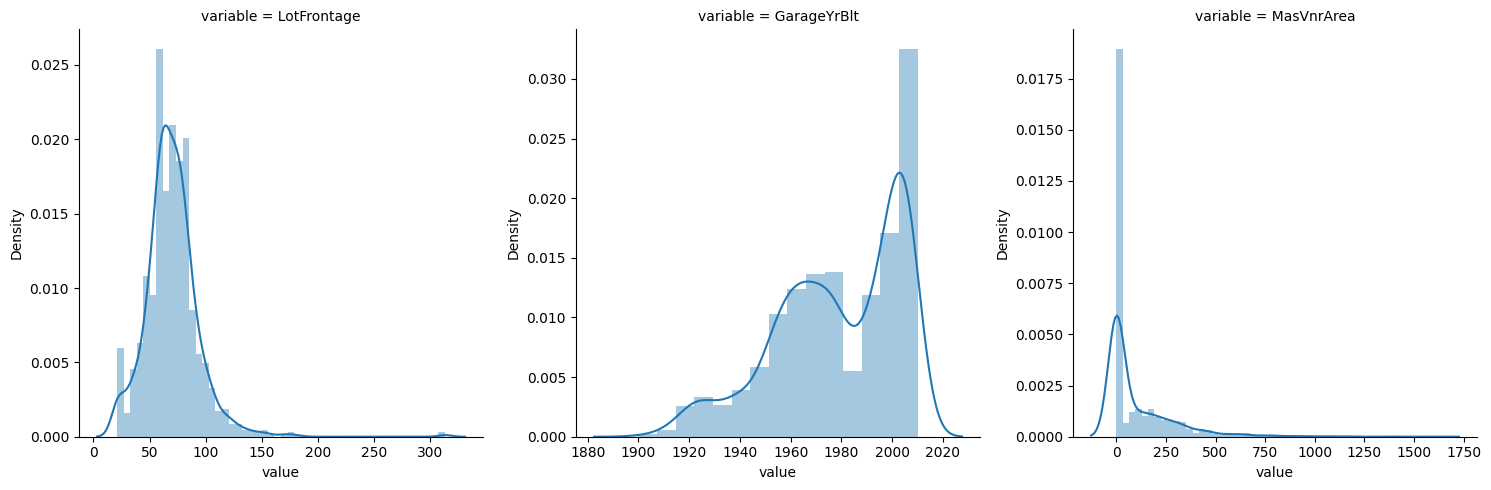

In [12]:
# function visualisasi facetgrid
def viz(df,types):
    num = df
    f = pd.melt(num, value_vars=num)
    g = sns.FacetGrid(f, col="variable",  col_wrap=3, 
                      sharex=False, sharey=False, height = 5)
    g = g.map(types, "value")
    plt.show()
    return (g)
import warnings
warnings.filterwarnings('ignore')
viz(to_fix, sns.distplot); # LotFrontage with median , GarageYrBlt mean , and MasVnrArea with median

karena fitur 'MasVnrArea' dan 'LotFrontage' skewness positif, maka bisa pake median

sedangkan untuk fitur 'GarageYrBlt' distribusi normal maka bisa pake mean

untuk menghilangkan missing value

In [17]:
# LotFrontage with median , GarageYrBlt mean , and MasVnrArea with median
df2[['MasVnrArea','LotFrontage']] = df2[['MasVnrArea','LotFrontage']].fillna(df2[['MasVnrArea','LotFrontage']].median())
df2['GarageYrBlt'] = df2['GarageYrBlt'].fillna(df2['GarageYrBlt'].mean())

untuk fitur yang berkategori lebih baik menggunakan modus

In [18]:
# categorical fixing with modus
col_to_cat_to_fix = df2[to_fix_col].describe(include = 'object').columns.tolist()
df2[col_to_cat_to_fix] = df2[col_to_cat_to_fix].fillna(df2[col_to_cat_to_fix].mode().iloc[0])

ketika dicek kembali pasti tidak ada missing value

In [20]:
cek = chek_missing(df2)
cek

,kolom,jumlah_NaN,persentase
0,Id,0,0.0
49,HalfBath,0,0.0
56,FireplaceQu,0,0.0
55,Fireplaces,0,0.0
54,Functional,0,0.0
...,...,...,...
25,MasVnrArea,0,0.0
24,MasVnrType,0,0.0
23,Exterior2nd,0,0.0
22,Exterior1st,0,0.0


Pisahkan antara kolumn tipe numerik dan kategori

In [21]:
# Set index
df2 = df2.set_index('Id')
# get column numeric
col_numeric = df2.describe().columns.tolist()
# get column object categorical
col_categoric = df2.describe(include="object").columns.tolist()

In [22]:
df2_numeric = df2[col_numeric]
df2_categoric = df2[col_categoric]
df2_numeric

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


In [23]:
df2_categoric

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal


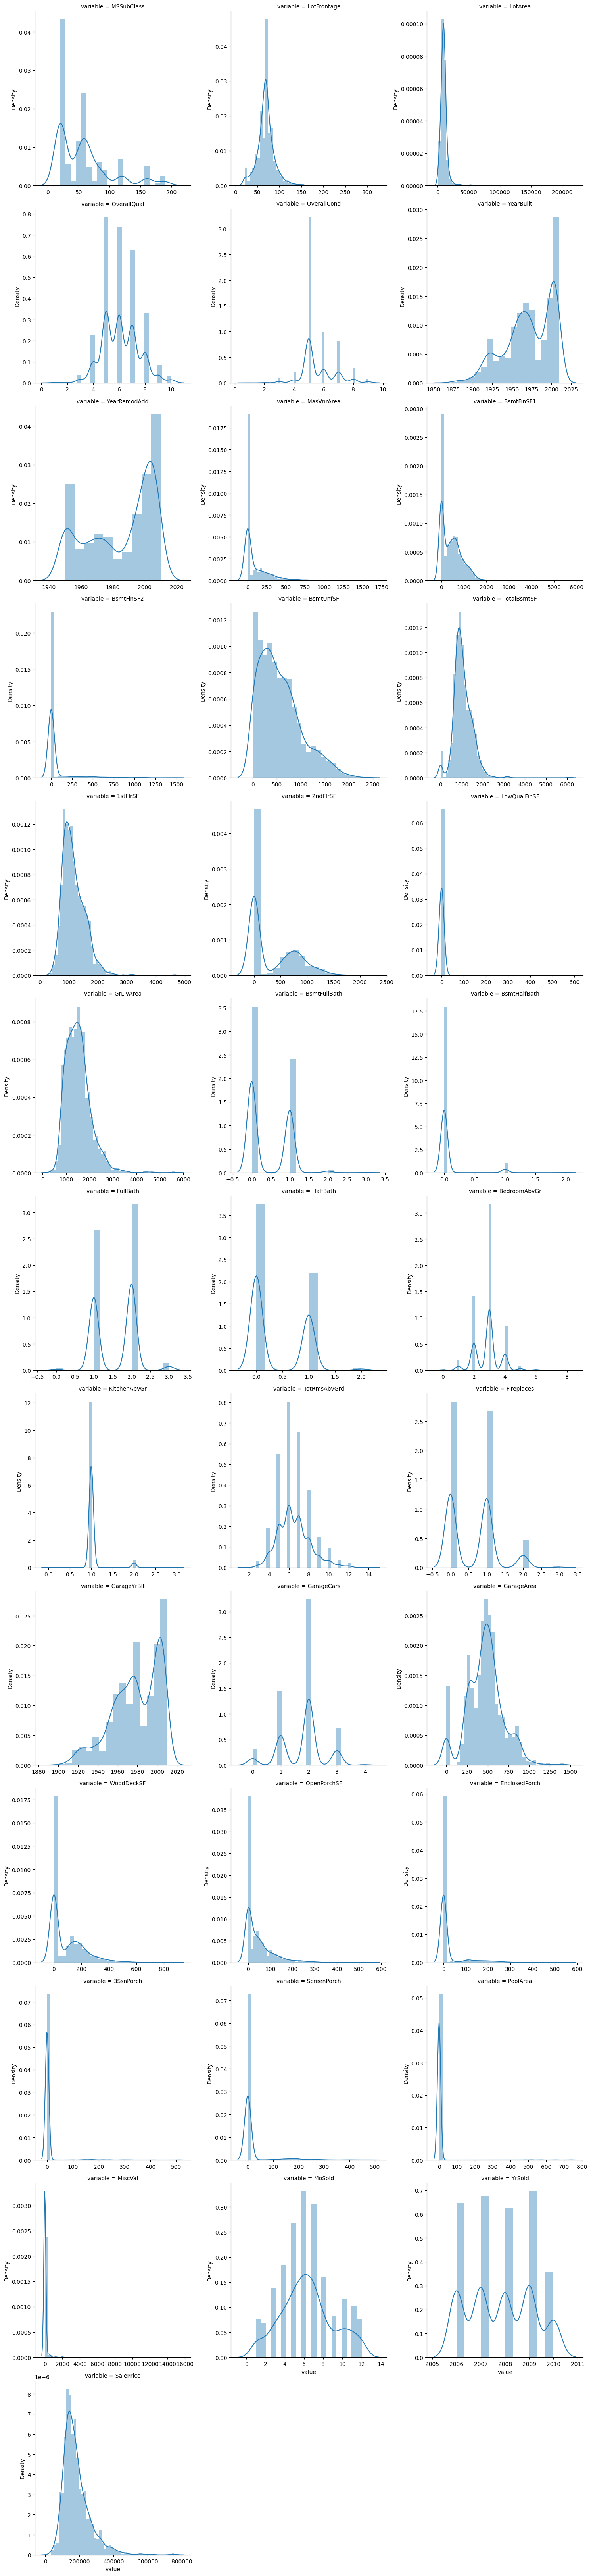

In [24]:
# check distribusi
viz(df2_numeric, sns.distplot);

Cek distribusi datanya, ternyata rata rata data mengalami skewness positif

In [25]:
skew_report = df2_numeric.skew().reset_index()
skew_report.columns = ['columns','skew_score']
skew_report.sort_values('skew_score', ascending  = False)

,columns,skew_score
33,MiscVal,24.476794
32,PoolArea,14.828374
2,LotArea,12.207688
30,3SsnPorch,10.304342
14,LowQualFinSF,9.011341
21,KitchenAbvGr,4.488397
9,BsmtFinSF2,4.255261
31,ScreenPorch,4.122214
17,BsmtHalfBath,4.103403
29,EnclosedPorch,3.089872


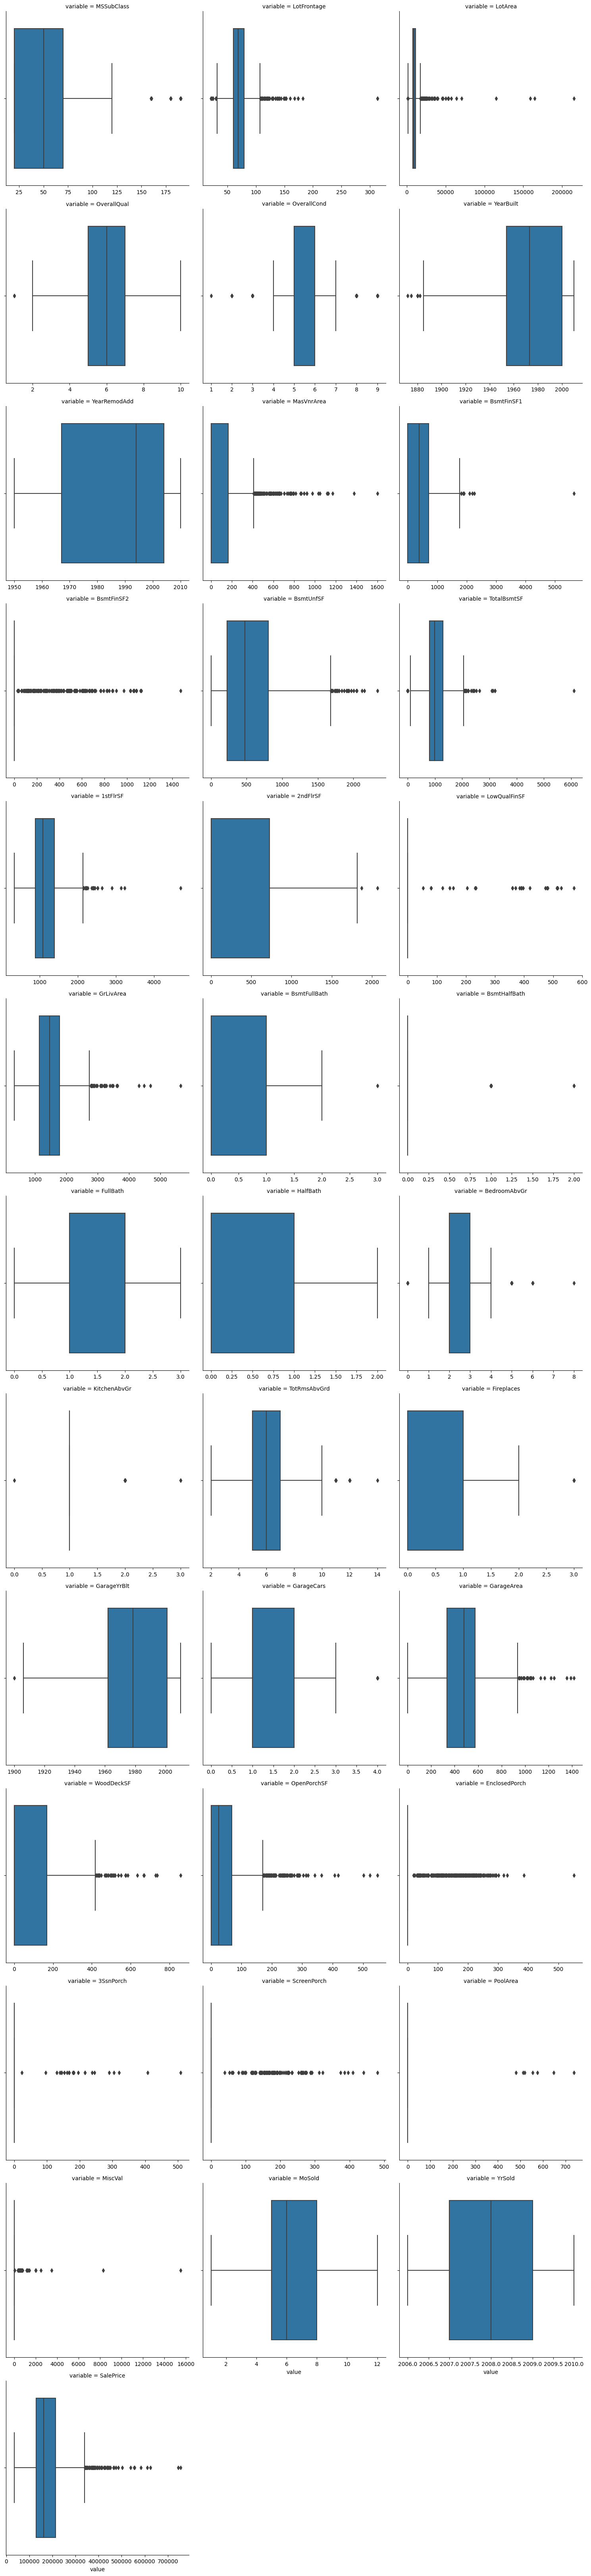

In [26]:
# outliers plots
viz(df2_numeric, sns.boxplot);

Dan data juga banyak outliernya

In [27]:
# outliers report
def outliers(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
    lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
    f = []
    for i in s:
        if i > upper_bound:
            f.append(i)
        elif i < lower_bound:
            f.append(i)
    sums = len(f)
    pros = len(f)/len(s)*100
    d = {'IQR':iqr,
         'Upper Bound':upper_bound,
        'Lower Bound':lower_bound,
        'Sum outliers': sums,'percentage outliers':pros}
    d = pd.DataFrame(d.items(),columns = ['sub','values'])
    return(d)

In [27]:
# mencari outliers details
for i in df2_numeric:
  print(i,'\n', display(outliers(df['WoodDeckSF'])))

,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


MSSubClass 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


LotFrontage 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


LotArea 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


OverallQual 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


OverallCond 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


YearBuilt 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


YearRemodAdd 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


MasVnrArea 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


BsmtFinSF1 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


BsmtFinSF2 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


BsmtUnfSF 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


TotalBsmtSF 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


1stFlrSF 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


2ndFlrSF 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


LowQualFinSF 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


GrLivArea 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


BsmtFullBath 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


BsmtHalfBath 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


FullBath 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


HalfBath 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


BedroomAbvGr 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


KitchenAbvGr 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


TotRmsAbvGrd 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


Fireplaces 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


GarageYrBlt 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


GarageCars 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


GarageArea 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


WoodDeckSF 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


OpenPorchSF 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


EnclosedPorch 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


3SsnPorch 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


ScreenPorch 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


PoolArea 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


MiscVal 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


MoSold 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


YrSold 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


SalePrice 
 None


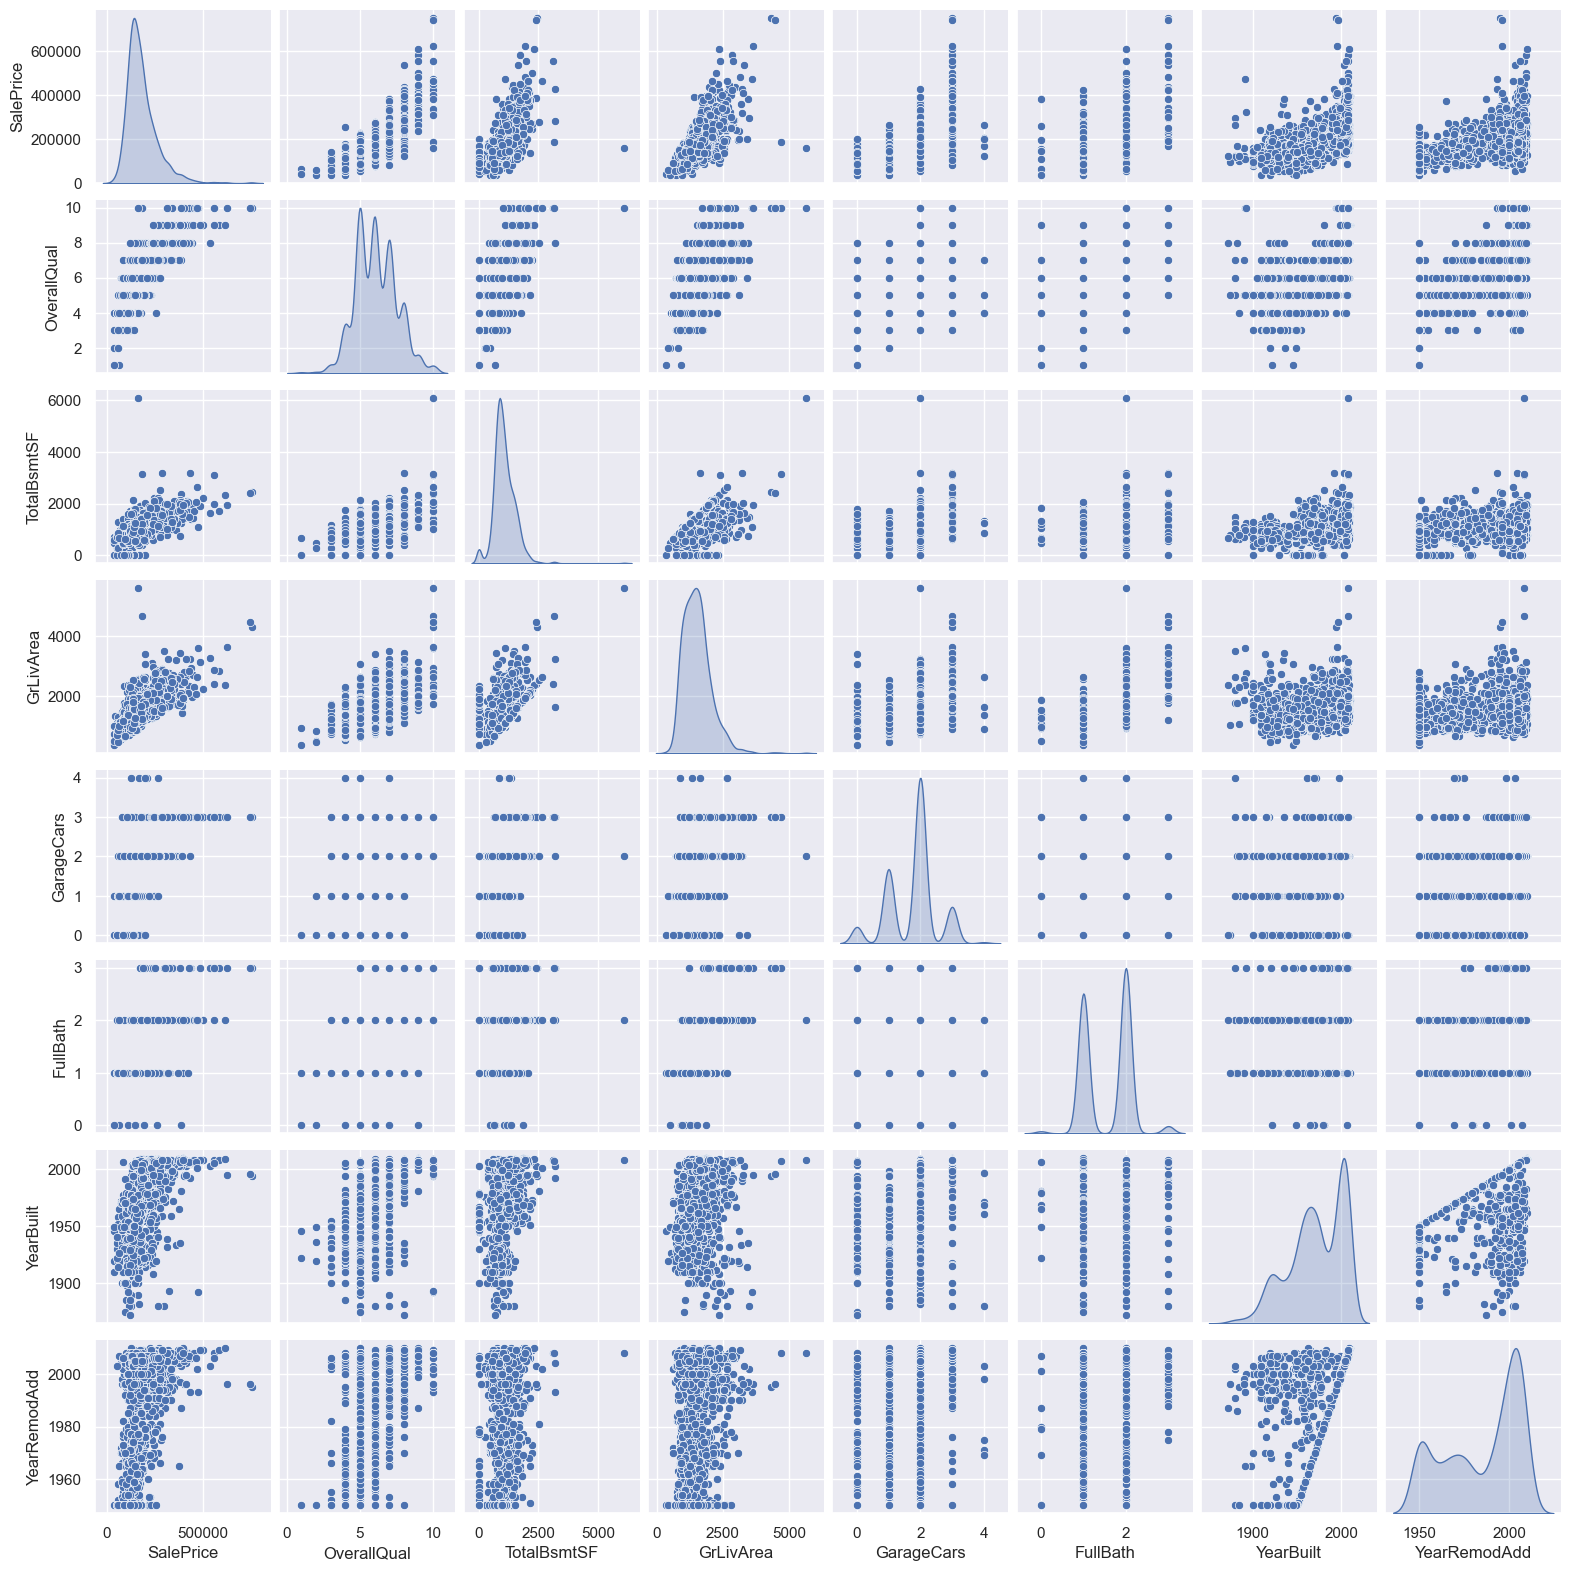

In [28]:
sns.set()
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageCars','FullBath','YearBuilt','YearRemodAdd']
sns.pairplot(df2_numeric[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

mencoba liat korelasi pakai scater

In [29]:
def corr_plot(df2, metode):
  plt.figure(figsize=(30,15))
  triangle = np.triu(np.ones_like(df2.corr(method = metode)))
  heatmap = sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True, mask = triangle)
  heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=12)
  return heatmap

Kalo ini pake heatmap

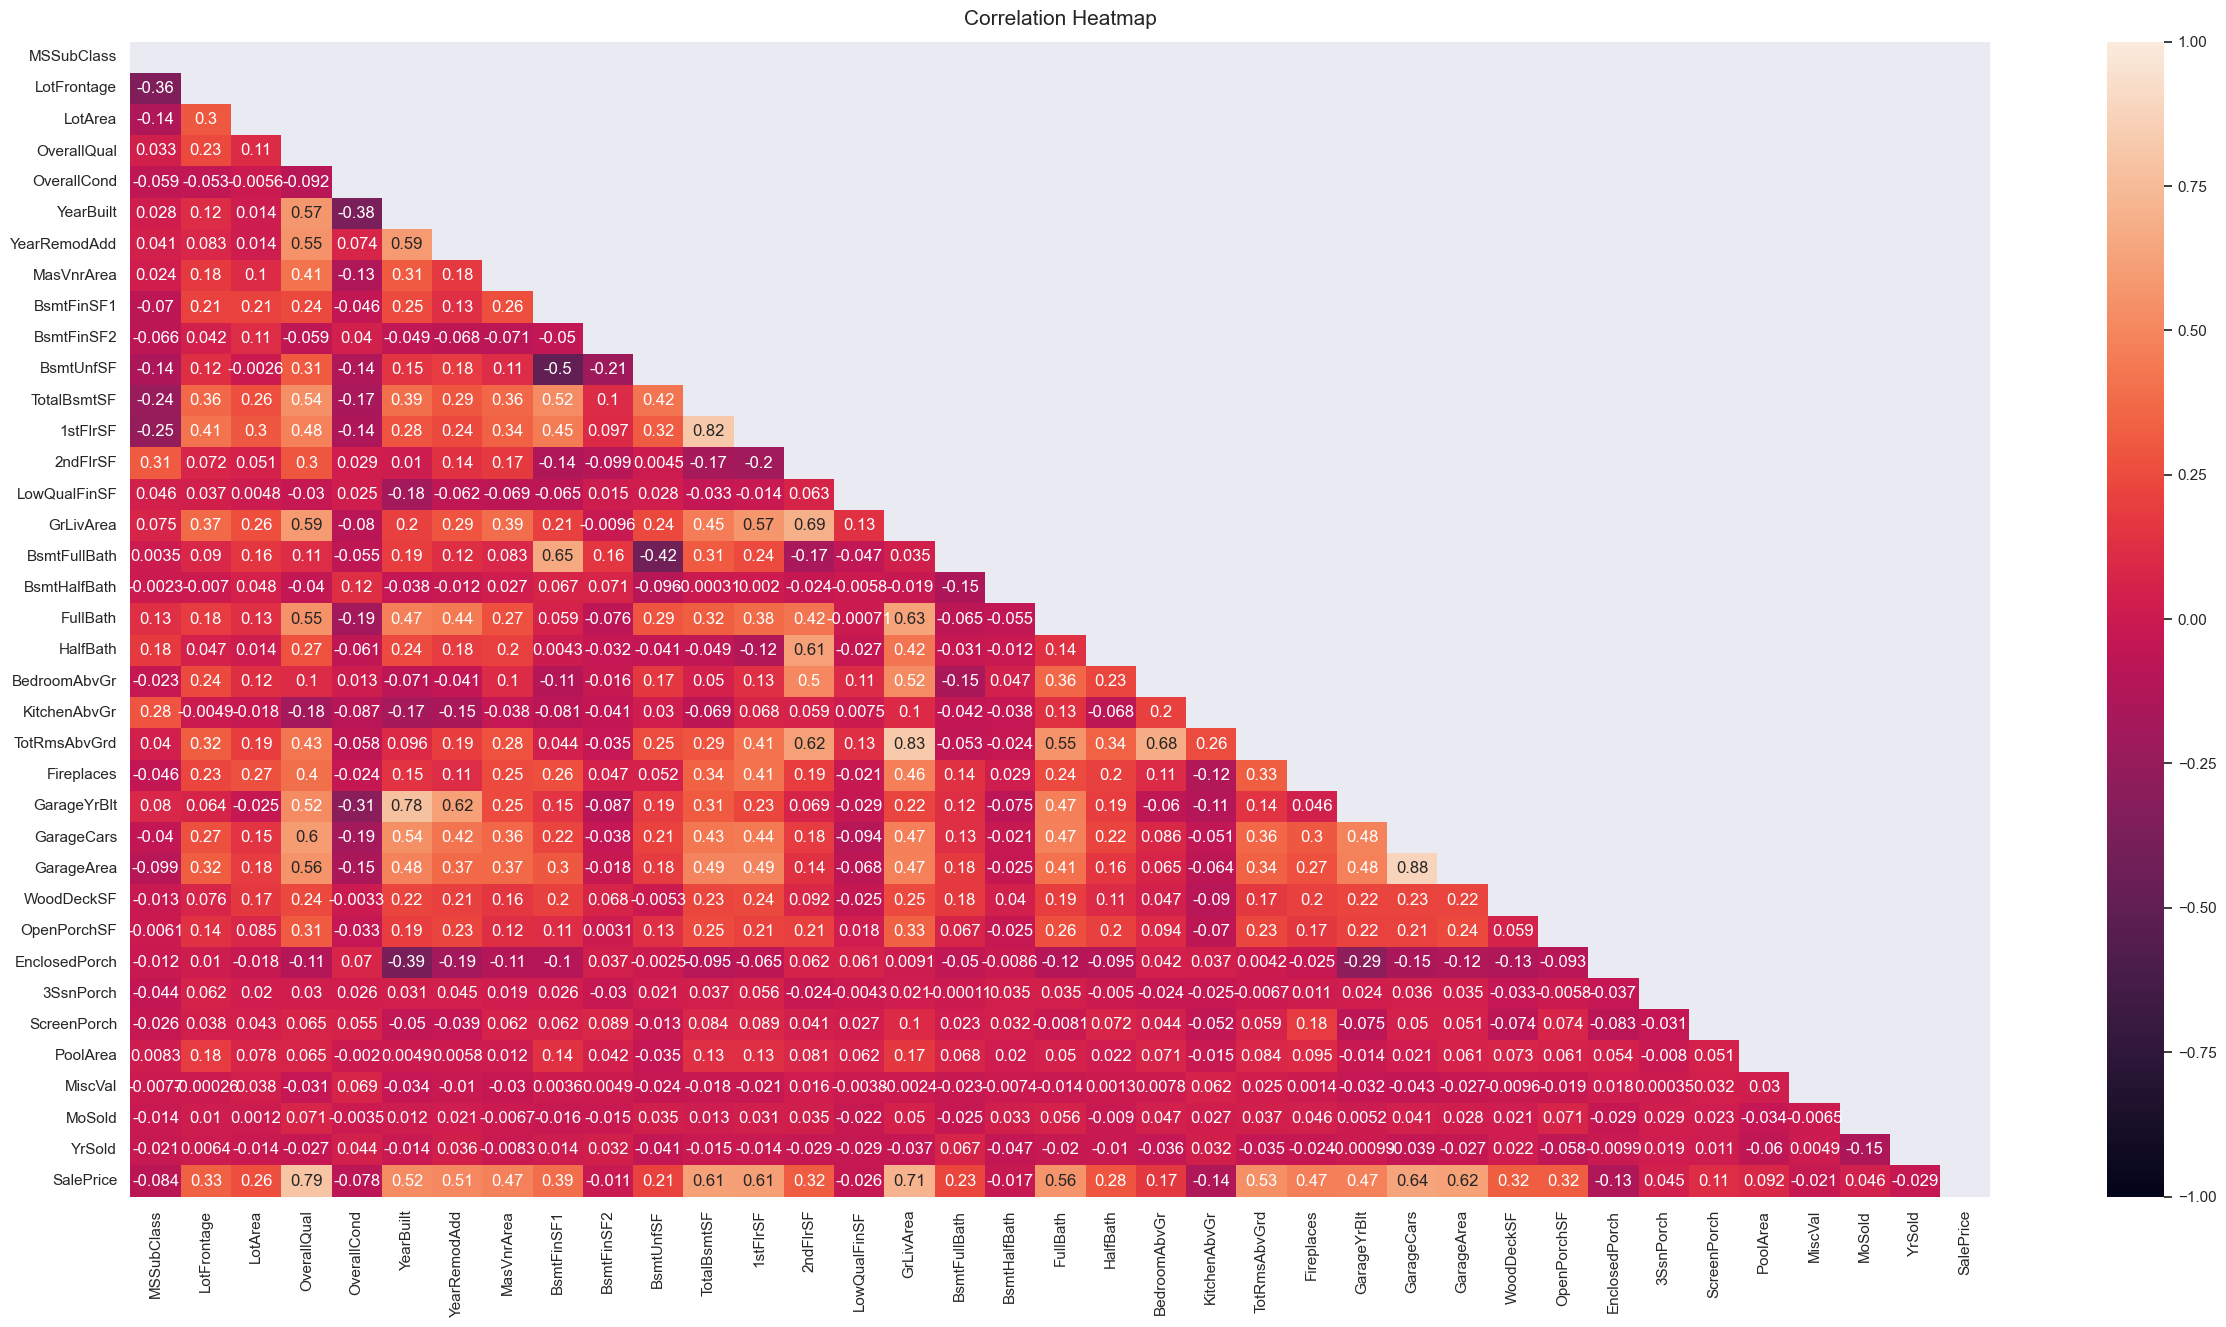

In [30]:
corr_plot(df2, "spearman");

t-test untuk mengetest data numerik apakah ada signifikan antar data

In [35]:
# T-Test
from scipy import stats
def t_test(df2, y):
  p_value = []
  colom = df2.columns.tolist()
  alpha = 0.05
  signifikan = []
  for i in df2:
    p_value.append(stats.ttest_ind(df2[i],y)[1])
    if stats.ttest_ind(df2[i],y)[1] <= alpha:
      signifikan.append('Signifikan')
    else:
      signifikan.append('Tidak Signifikan')
  df = pd.DataFrame()
  df['variabel'] = colom
  df['p-val'] = p_value
  df['signifikansi'] = signifikan
  return df

In [36]:
t_test(df2_numeric, df2_numeric.SalePrice)

,variabel,p-val,signifikansi
0,Id,0.0,Signifikan
1,MSSubClass,0.0,Signifikan
2,LotFrontage,0.0,Signifikan
3,LotArea,0.0,Signifikan
4,OverallQual,0.0,Signifikan
5,OverallCond,0.0,Signifikan
6,YearBuilt,0.0,Signifikan
7,YearRemodAdd,0.0,Signifikan
8,MasVnrArea,0.0,Signifikan
9,BsmtFinSF1,0.0,Signifikan


uji multicolenearity, agar fitur yang terlalu kuat korelasi bisa di filter

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [38]:
# encoding categorical to see multicol
for i in df2_categoric:
  df2_categoric[i] = df2_categoric[i].astype('category').cat.codes

In [39]:
# join numeric and categorical again
df2_categoric = df2_categoric.reset_index()
df2_numeric = df2_numeric.reset_index()
df3 = pd.merge(df2_numeric, df2_categoric, how = 'inner', on = 'Id')

In [40]:
X = df3.drop('SalePrice',1)
vif = calc_vif(X)
vif = vif.sort_values('VIF', ascending=False)
vif['VIF'] = round(vif.VIF)
vif[vif.VIF < 10]

,variables,VIF
27,GarageCars,6.0
28,GarageArea,6.0
7,YearBuilt,5.0
24,TotRmsAbvGrd,5.0
54,Exterior2nd,4.0
...,...,...
43,Utilities,1.0
37,YrSold,1.0
32,3SsnPorch,1.0
48,Condition2,1.0


## Cari inshigt bisnis

In [41]:
street = df[['Street', "SalePrice"]]
street['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [42]:
rate_str = street.groupby('Street').agg('mean').reset_index()
rate_str

,Street,SalePrice
0,Grvl,130190.500000
1,Pave,181130.538514


In [43]:
# def barplot comparison
def barplot_value(x, y, title):
  chart = sns.barplot(x=x, y=y, ci = None)
  chart.set_title(title)
  for p in chart.patches:
        chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
            textcoords='offset points')
  return chart      

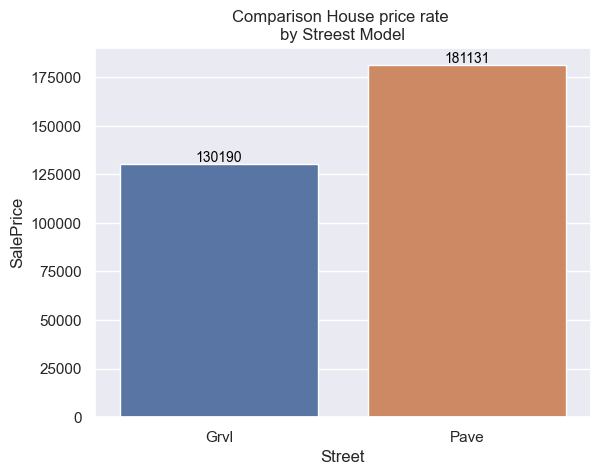

In [44]:
barplot_value(rate_str.Street, rate_str.SalePrice, "Comparison House price rate \nby Streest Model");

In [45]:
df[df.PoolArea>0]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
810,811,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,181000
1170,1171,80,RL,76.0,9880,Pave,NaN,Reg,Lvl,AllPub,...,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal,171000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1386,1387,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,...,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000
1423,1424,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,AllPub,...,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca,274970


In [46]:
pool = df[~df['PoolQC'].isna()][['PoolArea','PoolQC','SalePrice']]
pool

,PoolArea,PoolQC,SalePrice
197,512,Ex,235000
810,648,Fa,181000
1170,576,Gd,171000
1182,555,Ex,745000
1298,480,Gd,160000
1386,519,Fa,250000
1423,738,Gd,274970


In [47]:
pool_grup = pool.groupby('PoolQC').agg('mean').reset_index()
pool_grup

,PoolQC,PoolArea,SalePrice
0,Ex,533.5,490000.0
1,Fa,583.5,215500.0
2,Gd,598.0,201990.0


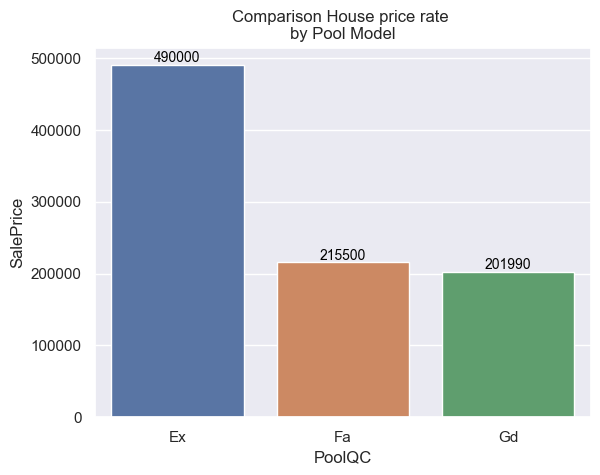

In [48]:
barplot_value(pool_grup.PoolQC, pool_grup.SalePrice, "Comparison House price rate \nby Pool Model");

In [49]:
sale_conditions = df[['SalePrice', 'SaleCondition']].groupby('SaleCondition').agg('mean')
sale_conditions

,SalePrice
SaleCondition,
Abnorml,146526.623762
AdjLand,104125.000000
Alloca,167377.416667
Family,149600.000000
Normal,175202.219533
Partial,272291.752000


In [50]:
sale_conditions['Jumlah_sale_condition_Type'] = df['SaleCondition'].value_counts()
sale_conditions['prosentase_KondisiPenjualan'] = df['SaleCondition'].value_counts()/len(df)*100
sale_conditions = sale_conditions.reset_index()
sale_conditions 

,SaleCondition,SalePrice,Jumlah_sale_condition_Type,prosentase_KondisiPenjualan
0,Abnorml,146526.623762,101,6.917808
1,AdjLand,104125.000000,4,0.273973
2,Alloca,167377.416667,12,0.821918
3,Family,149600.000000,20,1.369863
4,Normal,175202.219533,1198,82.054795
5,Partial,272291.752000,125,8.561644


In [51]:
# penjelasan dict
dicts = {10:"Very Excellent",9:"Excellent",8:"Very Good",7:"Good",6	:"Above Average",
 5	:"Average", 4	: "Below Average" ,3:"Fair" ,2:"Poor", 1 :	"Very Poor"}

# convert to dictsA
df['OverallQual_desc'] = df['OverallQual'].replace(dicts)

# grouping
qualitas_material = df[['OverallQual','SalePrice','OverallQual_desc']].groupby('OverallQual_desc').agg("mean").reset_index()
qualitas_material['jumlah_kualitasType'] = df['OverallQual'].value_counts().tolist()
qualitas_material = qualitas_material.sort_values('SalePrice', ascending = False)
rata_atas = qualitas_material[qualitas_material.OverallQual >= 6]
rata_atas

,OverallQual_desc,OverallQual,SalePrice,jumlah_kualitasType
7,Very Excellent,10.0,438588.388889,18
3,Excellent,9.0,367513.023256,168
8,Very Good,8.0,274735.535714,3
5,Good,7.0,207716.423197,43
0,Above Average,6.0,161603.034759,397


In [52]:
rata_atas.jumlah_kualitasType.sum()

629

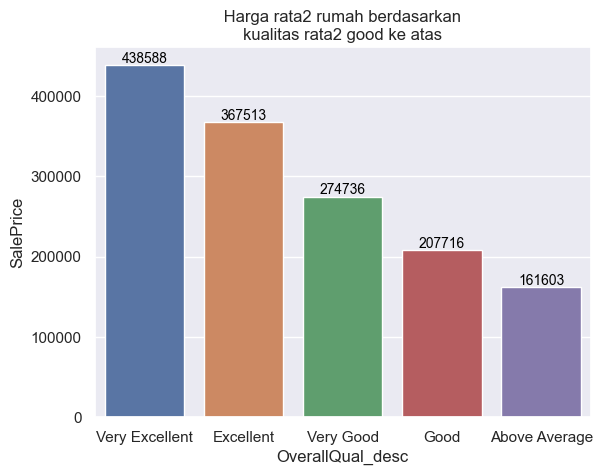

In [53]:
barplot_value(rata_atas.OverallQual_desc, rata_atas.SalePrice , " Harga rata2 rumah berdasarkan \nkualitas rata2 good ke atas");